# Inheritance

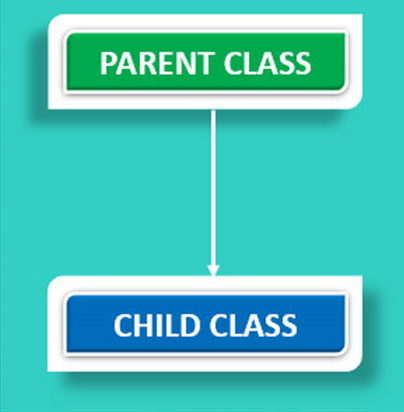

### Child class will inherit the attributes and methods from Parent class

In [1]:
class Person:

    def __init__(self, name, age) -> None:
        self.name = name
        self.age = age 

    def introduce(self):
        print(f"Hi there my name is {self.name}")
        print(f"I am currently {self.age} years old")

In [2]:
class Employee(Person):

    def __init__(self, name, age, company) -> None:
        super().__init__(name, age)
        self.company = company
        
    def work(self):
        print(f"I work for {self.company}")

In [3]:
p1 = Person(name="Sarthak", age=32)

In [4]:
p1.name

'Sarthak'

In [5]:
p1.age

32

In [6]:
p1.introduce()

Hi there my name is Sarthak
I am currently 32 years old


In [7]:
type(p1)

__main__.Person

In [8]:
e1 = Employee(name="Raman", age=25, company="Infosys")
type(e1)

__main__.Employee

In [9]:
e1.name

'Raman'

In [10]:
e1.age

25

In [11]:
e1.company

'Infosys'

In [12]:
e1.work()

I work for Infosys


In [13]:
e1.introduce()

Hi there my name is Raman
I am currently 25 years old


In [14]:
e1.introduce()
e1.work()

Hi there my name is Raman
I am currently 25 years old
I work for Infosys


### Pydantic for data validation

In [15]:
%pip install pydantic email-validator

  Using cached email_validator-2.2.0-py3-none-any.whl.metadata (25 kB)
  Using cached dnspython-2.6.1-py3-none-any.whl.metadata (5.8 kB)
Using cached email_validator-2.2.0-py3-none-any.whl (33 kB)
Using cached dnspython-2.6.1-py3-none-any.whl (307 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
from pydantic import BaseModel, Field, EmailStr

In [17]:
from typing import List

In [18]:
from datetime import date

In [19]:
date.today()

datetime.date(2024, 9, 21)

In [20]:
class Student(BaseModel):

    roll_no: int = Field(description="Roll Number of student", gt=0)
    name: str = Field(description="Name of the student", min_length=3)
    email: EmailStr = Field(description="Email for student")
    hobbies: List[str] = Field(description="Student Hobbies", default_factory=list)
    doj: date = Field("Date of Joining", le=date.today())

    def get_student_info(self):
        print(f"Roll Number : {self.roll_no}")
        print(f"Name : {self.name}")
        print(f"Email : {self.email}")
        print(f"Hobbies : {self.hobbies}")
        print(f"Date of Joining : {self.doj}")

In [21]:
s1 = Student(
    roll_no= 101,
    name = "Rahul",
    email= "example@test.com",
    hobbies= ["Singing", "Cricket"],
    doj = date(2024, 2, 10)
)

In [22]:
s1

Student(roll_no=101, name='Rahul', email='example@test.com', hobbies=['Singing', 'Cricket'], doj=datetime.date(2024, 2, 10))

In [23]:
s1.roll_no

101

In [24]:
s1.name

'Rahul'

In [25]:
s1.email

'example@test.com'

In [26]:
s1.hobbies

['Singing', 'Cricket']

In [27]:
s1.doj

datetime.date(2024, 2, 10)

In [28]:
s1.get_student_info()

Roll Number : 101
Name : Rahul
Email : example@test.com
Hobbies : ['Singing', 'Cricket']
Date of Joining : 2024-02-10


In [29]:
s2 = Student(
    roll_no=10.5,
    name = "",
    email = "example",
    hobbies= "singing",
    doj = "23rd Jan 2024"
)

ValidationError: 5 validation errors for Student
roll_no
  Input should be a valid integer, got a number with a fractional part [type=int_from_float, input_value=10.5, input_type=float]
    For further information visit https://errors.pydantic.dev/2.9/v/int_from_float
name
  String should have at least 3 characters [type=string_too_short, input_value='', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/string_too_short
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='example', input_type=str]
hobbies
  Input should be a valid list [type=list_type, input_value='singing', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/list_type
doj
  Input should be a valid date or datetime, invalid character in year [type=date_from_datetime_parsing, input_value='23rd Jan 2024', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/date_from_datetime_parsing

### Multilevel Inheritance

In [51]:
class Employee2:

    def __init__(self, emp_id, name) -> None:
        self.emp_id = emp_id
        self.name = name 

    def get_employee_info(self):
        print(f"Employee id : {self.emp_id}")
        print(f"Name : {self.name}")   

In [52]:
class Manager(Employee2):

    def __init__(self, emp_id, name, dept) -> None:
        super().__init__(emp_id, name)
        self.dept = dept

    def get_manger_info(self):
        print(f"Departement : {self.dept}")

In [53]:
class ProjectManager(Manager):

    def __init__(self, emp_id, name, dept, project) -> None:
        super().__init__(emp_id, name, dept)
        self.project = project

    def get_project_info(self):
        print(f"Project Name : {self.project}")

In [54]:
e2 = Employee2(emp_id=103, name="Sarthak")
type(e2)

__main__.Employee2

In [55]:
e2.emp_id

103

In [56]:
e2.name

'Sarthak'

In [57]:
e2.get_employee_info()

Employee id : 103
Name : Sarthak


In [58]:
m2 = Manager(emp_id=102, name="Rahul", dept="Engg.")
type(m2)

__main__.Manager

In [59]:
m2.emp_id

102

In [60]:
m2.name

'Rahul'

In [61]:
m2.dept

'Engg.'

In [62]:
m2.get_employee_info()

Employee id : 102
Name : Rahul


In [63]:
m2.get_manger_info()

Departement : Engg.


In [64]:
m2.get_employee_info()
m2.get_manger_info()

Employee id : 102
Name : Rahul
Departement : Engg.


In [65]:
pm2 = ProjectManager(emp_id=101, name="Raman", dept="Engg.", project="Tesla")
type(pm2)

__main__.ProjectManager

In [66]:
pm2.emp_id

101

In [67]:
pm2.name

'Raman'

In [68]:
pm2.dept

'Engg.'

In [69]:
pm2.project

'Tesla'

In [70]:
pm2.get_employee_info()
pm2.get_manger_info()
pm2.get_project_info()

Employee id : 101
Name : Raman
Departement : Engg.
Project Name : Tesla


### Hierarchical Inhertance

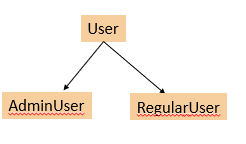

In [86]:
class User:

    def __init__(self, id, username, email) -> None:
        self.id = id 
        self.username = username
        self.email = email 

    def get_user_info(self):
        print(f"User Id : {self.id}")
        print(f"username : {self.username}")
        print(f"Email : {self.email}")

In [87]:
class AdminUser(User):

    def __init__(self, id, username, email, access) -> None:
        super().__init__(id, username, email)
        self.access = access

    def get_access_level(self):
        print(f"Access : {self.access}")

In [88]:
class RegularUser(User):

    def __init__(self, id, username, email, sub) -> None:
        super().__init__(id, username, email)
        self.sub = sub

    def get_sub_type(self):
        print(f"Subscription Type : {self.sub}")

In [89]:
u1 = User(id=1, username="utkarsh1", email="utkarh@gmail.com")
type(u1)

__main__.User

In [90]:
u1.id

1

In [91]:
u1.username

'utkarsh1'

In [92]:
u1.email

'utkarh@gmail.com'

In [93]:
u1.get_user_info()

User Id : 1
username : utkarsh1
Email : utkarh@gmail.com


In [94]:
a1 = AdminUser(id=2, username="Sam", email="sam@test.com", access="partial")
type(a1)

__main__.AdminUser

In [95]:
a1.id

2

In [96]:
a1.username

'Sam'

In [97]:
a1.email

'sam@test.com'

In [98]:
a1.access

'partial'

In [99]:
a1.get_user_info()
a1.get_access_level()

User Id : 2
username : Sam
Email : sam@test.com
Access : partial


In [100]:
r1 = RegularUser(id=3, username="John", email="john@test.com", sub="paid-yearly")
type(r1)

__main__.RegularUser

In [101]:
r1.id

3

In [102]:
r1.username

'John'

In [103]:
r1.email

'john@test.com'

In [104]:
r1.sub

'paid-yearly'

In [105]:
r1.get_user_info()
r1.get_sub_type()

User Id : 3
username : John
Email : john@test.com
Subscription Type : paid-yearly


In [106]:
r1.get_access_level()

AttributeError: 'RegularUser' object has no attribute 'get_access_level'